In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### What if you have _other_ types of data?

A summary of pandas input/output (I/O) tools is [here](https://pandas.pydata.org/docs/user_guide/io.html). Here are some things we can directly import:
* CSVs
* JSON
* text (rtf, txt)
* HTML
* MS Excel
* Pickle (Python file format)
* Parquet
* And many others...

With HTML, you might want to parse it using Beautiful Soup. With PDFs, I suggest using Tabula.

### Your task

Import your own personal data file (or better yet, several of them!). Extract the timestamp data. Export it as a CSV file and save it.



In [41]:
df = pd.read_json("StreamingHistory0.json")
df.head()

,endTime,artistName,trackName,msPlayed
0,2022-12-02 00:03,JID,Surround Sound (feat. 21 Savage & Baby Tate),229938
1,2022-12-02 00:06,Spence Lee,Bag on a Bag,172000
2,2022-12-02 00:09,PROBASS ∆ HARDI,ГОВОРИТЬ КИЇВ,183783
3,2022-12-02 00:12,blnkspc_,Brasil,169000
4,2022-12-02 00:13,OhGeesy Stiiizy,Slide Thru,100124


In [42]:
#Taking time column and export
dfTime = df[['endTime']]
dfTime.to_csv("timestamps.csv", index=False)
dfTime.head()


,endTime
0,2022-12-02 00:03
1,2022-12-02 00:06
2,2022-12-02 00:09
3,2022-12-02 00:12
4,2022-12-02 00:13


# Part 2

In [43]:
gData = pd.read_csv('Grant_timestamps.csv')
gData.head()


,Unnamed: 0,ts
0,0,2022-11-16 23:46:49+00:00
1,1,2022-11-16 23:50:15+00:00
2,2,2022-11-16 23:54:20+00:00
3,3,2022-11-16 23:58:48+00:00
4,4,2022-11-17 00:02:50+00:00


In [44]:
gData['ts'] = pd.to_datetime(gData['ts'])
gData = gData.sort_values(by = 'ts', ascending=True)
gData.head()

,Unnamed: 0,ts
0,0,2022-11-16 23:46:49+00:00
1,1,2022-11-16 23:50:15+00:00
2,2,2022-11-16 23:54:20+00:00
3,3,2022-11-16 23:58:48+00:00
4,4,2022-11-17 00:02:50+00:00


In [45]:
# Using pandas.diff(), make new col
gData['Difference'] = gData['ts'].diff()

# Answer: 
What is the longest time between timestamps? What is the average time between timestamps?

In [46]:
longestTime = gData['Difference'].max()
longestTime

Timedelta('4 days 04:29:06')

In [47]:
avgTime = gData['Difference'].mean()
avgTime

Timedelta('0 days 00:35:01.174720136')

# Answer: 
What is the day with the most timestamps? How many events (timestamps) were on that day?

In [48]:
gData['day'] = gData['ts'].dt.day #datetime to get day
mostTsDay = gData['day'].value_counts().idxmax()
mostTsDay


28

In [49]:
countMostTsDay = gData['day'].value_counts().max()
countMostTsDay

813

# Answer: 
What is the month with the most timestamps? How many events (timestamps) were on that month?

In [50]:
gData['month'] = gData['ts'].dt.month
tsMonth = gData['month'].value_counts().idxmax()
countMonth = gData['month'].value_counts().max()

print('Most time stamps on month', tsMonth, ', count =', countMonth)

Most time stamps on month 12 , count = 1948


# Analyze: 
Create at least one visualization of this data, using matplotlib/pyplot or Seaborn (refer back to our earlier class activities on visualizing time series data).  What can they tell you about the data?

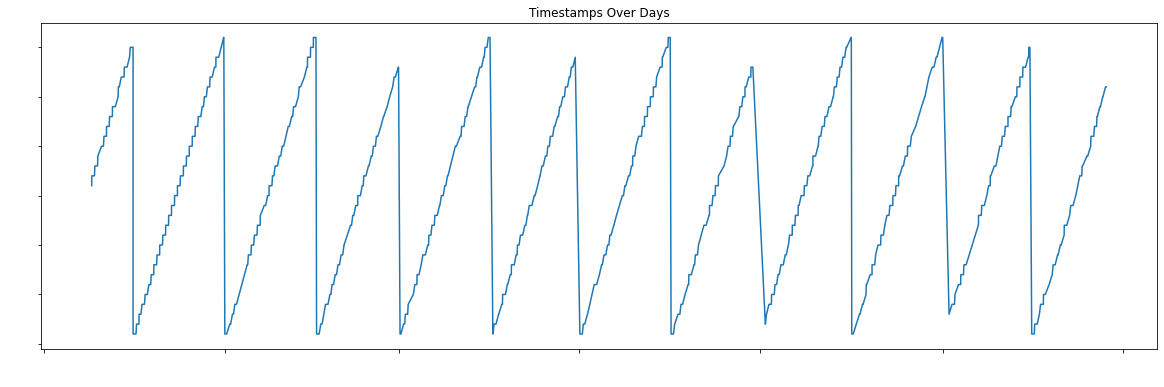

In [51]:
plt.figure(figsize=(20, 6))
sns.lineplot(x=gData['ts'], y=gData['day'])
plt.title('Timestamps Over Days')
plt.xlabel('Timestamp', color = 'white')
plt.ylabel('Number of Timestamps', color = 'white')
#made color whit everywhere as my IDE background was black
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()


I have no idea what the type of data is but it could be streaming timestamp data, but I am not sure what to make of the repeating pattern. The pattern is very interesting which confuses me. Seeing as there could be up to 813 timestamps in a single day is also confusing, but does align with some streaming data. The longest distance being 4 days and the average time between time stamps being half an hour keeps me thinking that this is some kind of streaming service, such as music. 

# Grant's Comments on Baasil's Analysis
Exchange your analysis with your partner. Read your partner's analysis --

Did they guess the correct data source (or type of data source)?

For the days and months that your partner identified as having the most timestamps in your data, try to figure out what was happening on those days.

What other data might help you figure this out?

# Part 4


I will be answering the questions:
1. What are the top 5 most played tracks in my Spotify listening history?
2. How does the average listening duration vary between weekdays and weekends?

In [18]:
df.head()

,endTime,artistName,trackName,msPlayed
0,2022-12-02 00:03,JID,Surround Sound (feat. 21 Savage & Baby Tate),229938
1,2022-12-02 00:06,Spence Lee,Bag on a Bag,172000
2,2022-12-02 00:09,PROBASS ∆ HARDI,ГОВОРИТЬ КИЇВ,183783
3,2022-12-02 00:12,blnkspc_,Brasil,169000
4,2022-12-02 00:13,OhGeesy Stiiizy,Slide Thru,100124


In [ ]:
df['endTime'] = pd.to_datetime(df['endTime']) #converting time column to datetime

In [22]:
#Answering Question 1
top_songs = df.groupby('trackName')['msPlayed'].sum() #aggregates listening duration for each individual song
top_songs = top_songs.sort_values(ascending=False).head(5) 
top_songs#Sorts from high to low, giving me top 5 most listened to songs

trackName
Quickie                                 6913252
Valores del West                        6214302
No Lo Entiendo                          5348126
Set dos Casados                         5196164
275 Be the Team (feat. Chris Travis)    5042788
Name: msPlayed, dtype: int64

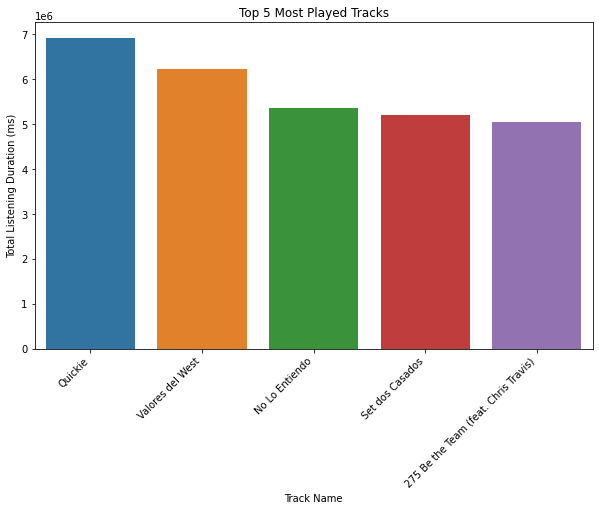

In [23]:
#Creating Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_songs.index, y=top_songs.values)
plt.title('Top 5 Most Played Tracks')
plt.xlabel('Track Name')
plt.ylabel('Total Listening Duration (ms)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

These results do not seem out of the ordinary. Not neccesarily what I would expect, but they all make sense. It does seem a bit intrestingly dated. 

In [35]:
#Answering question 2
df['dayName'] = df['endTime'].dt.day_name() #used Pandas documentation
df['weekend'] = df['dayName'].isin(['Saturday', 'Sunday']) #lets me sepearate weekends and weekdays (true if weekend, false if weekday)
df['minPlayed'] = df['msPlayed'] / 6000 #for easier readbility

In [36]:
#Average listening time of both types of days
AvgMinPlayed_by_day = df.groupby('weekend')['minPlayed'].mean()
print("Average Listening Duration:")

print(AvgMinPlayed_by_day)

Average Listening Duration:
weekend
False    16.528361
True     17.337504
Name: minPlayed, dtype: float64


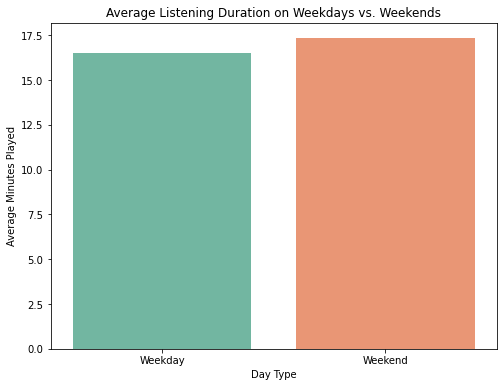

In [39]:
plt.figure(figsize=(8, 6))
sns.barplot(x=AvgMinPlayed_by_day.index, y=AvgMinPlayed_by_day.values, palette='Set2')
plt.title('Average Listening Duration on Weekdays vs. Weekends')
plt.xlabel('Day Type')
plt.ylabel('Average Minutes Played')
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'], rotation=0)
plt.show()

False is my average minutes played on weekdays, and True is the average for weekends (for the raw data table, the graph is labeled). It makes sense that the Weekends are greater, but I do know that I listent to study music a lot during the week, so I'm wondering if this analysis captures that. I am suprised that my average listening time is so low. I typically listen to music for longer than just 20 minutes a day which is interesting. The amount of variability between the weekends and weekdays is not unexpected.

# Sources
https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day_name.html